# San Francisco Bay Area Bike Share

![alt text](dataset-cover.jpg)

Anonymized bike trip data from August 2013 to August 2015 (download [here](https://www.kaggle.com/benhamner/sf-bay-area-bike-share))

------

## Generic setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
FIG_SIZE = (25, 10)

------

## Station

### Description

Each row represents a station where users can pickup or return bikes.

* **id** - unique identifier for the station
* **name** - station's name
* **lat** - latitude
* **long** - longitude
* **dock_count** - number of bikes the station can hold
* **city** - city's name
* **installation_date** - station's installation date

### Load station data set

Take a sample record to inspect and check the number of records in the dataset.

In [5]:
stationFilePath = 'data/station.csv'

In [6]:
stationDataFrame = pd.read_csv(stationFilePath)

In [7]:
stationDataFrame.sample(1)

,id,name,lat,long,dock_count,city,installation_date
20,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013


In [8]:
stationDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [9]:
print(len(stationDataFrame))

70


In [10]:
stationDataFrame.describe()

,id,lat,long,dock_count
count,70.000000,70.000000,70.000000,70.000000
mean,43.000000,37.590243,-122.218416,17.657143
std,24.166092,0.203473,0.209446,4.010442
min,2.000000,37.329732,-122.418954,11.000000
25%,24.250000,37.389483,-122.400601,15.000000
50%,43.500000,37.631163,-122.312123,15.000000
75%,63.750000,37.788123,-122.078009,19.000000
max,84.000000,37.804770,-121.877349,27.000000


### Data cleaning

* Convert dates to datetime 

In [11]:
stationDataFrame.installation_date = pd.to_datetime(stationDataFrame.installation_date)

### Number of dock count by city

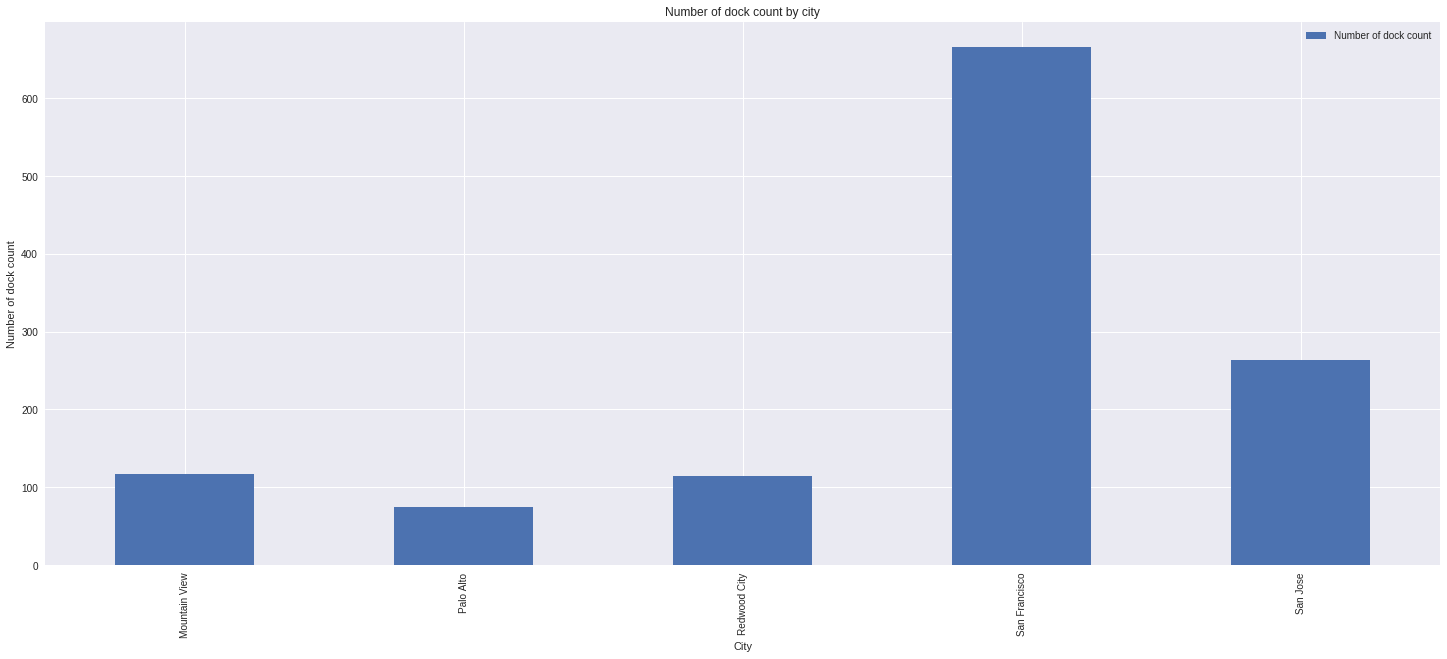

In [12]:
grouped = stationDataFrame.groupby('city').sum()
axesSubplot = grouped.dock_count.plot(kind='bar', figsize=FIG_SIZE)
axesSubplot.set(xlabel='City', ylabel='Number of dock count', title='Number of dock count by city')
axesSubplot.legend(['Number of dock count'])

As we can see in the figure shown above, the city of _San Francisco_ has a significantly larger number of available spaces. The second one is the city of _San Jose_ with a total number of bikes that the stations can hold less than half of the city of _San Francisco_.

### Number of dock count by installation date

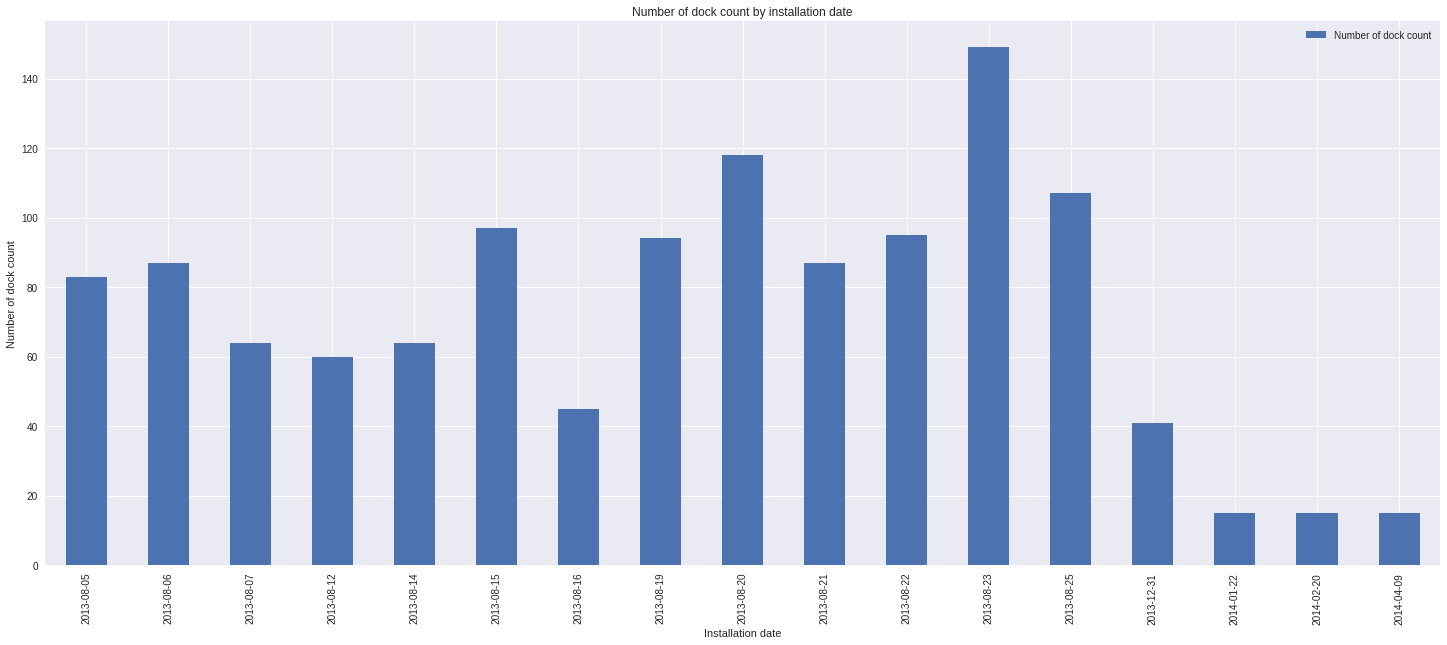

In [13]:
grouped = stationDataFrame.groupby(pd.DatetimeIndex(stationDataFrame.installation_date).date).sum()
axesSubplot = grouped.dock_count.plot(kind='bar', figsize=FIG_SIZE)
axesSubplot.set(xlabel='Installation date', ylabel='Number of dock count', title='Number of dock count by installation date')
axesSubplot.legend(['Number of dock count'])

In this graph we can see that the greatest creation of stations was in August 2013 and then only some were added during 2014, which do not exceed any of the initial loads.

------

## Weather

### Description 

Each row represents the weather for a specific day and zip code in the bay area.

* **date** - current date
* **max_temperature_f** - maximum temperature value 
* **mean_temperature_f** - mean temperature value
* **min_temperature_f** - minimum temperature value
* **max_dew_point_f** - maximum dew point value
* **mean_dew_point_f** - mean dew point value
* **min_dew_point_f** - minimun dew point value
* **max_humidity** - maximum humidity value
* **mean_humidity** - mean humidity value
* **min_humidity** - min humidity value
* **max_sea_level_pressure_inches** - maximum sea level pressure value
* **mean_sea_level_pressure_inches** - mean sea level pressure value
* **min_sea_level_pressure_inches** - minimun sea level pressure value
* **max_visibility_miles** - maximum visibility value
* **mean_visibility_miles** - mean visibility value
* **min_visibility_miles** - minimun visibility value
* **max_wind_Speed_mph** - maximum wind speed
* **mean_wind_speed_mph** - mean wind speed
* **max_gust_speed_mph** - maximum gust speed
* **precipitation_inches** - precipitation value
* **cloud_cover** - clould cover
* **events** - events
* **wind_dir_degrees** - wind direction 
* **zip_code** - zip code

### Load weather data set

Take a sample record to inspect and check the number of records in the dataset.

In [14]:
weatherFilePath = 'data/weather.csv'

In [15]:
weatherDataFrame = pd.read_csv(weatherFilePath)

In [16]:
weatherDataFrame.sample(1)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
2462,5/16/2015,62.0,58.0,53.0,48.0,48.0,48.0,82.0,76.0,59.0,...,10.0,10.0,20.0,8.0,25.0,0,7.0,NaN,251.0,94063


In [17]:
weatherDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
date                              3665 non-null object
max_temperature_f                 3661 non-null float64
mean_temperature_f                3661 non-null float64
min_temperature_f                 3661 non-null float64
max_dew_point_f                   3611 non-null float64
mean_dew_point_f                  3611 non-null float64
min_dew_point_f                   3611 non-null float64
max_humidity                      3611 non-null float64
mean_humidity                     3611 non-null float64
min_humidity                      3611 non-null float64
max_sea_level_pressure_inches     3664 non-null float64
mean_sea_level_pressure_inches    3664 non-null float64
min_sea_level_pressure_inches     3664 non-null float64
max_visibility_miles              3652 non-null float64
mean_visibility_miles             3652 non-null float64
min_visibility_miles              3652 non-null float6

In [18]:
print(len(weatherDataFrame))

3665


In [19]:
weatherDataFrame.describe()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
count,3661.000000,3661.000000,3661.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3664.000000,...,3664.000000,3652.000000,3652.000000,3652.000000,3664.000000,3664.000000,2766.000000,3664.000000,3664.000000,3665.000000
mean,70.580989,61.348812,51.947282,53.149820,48.794794,44.306840,85.446968,67.256993,46.458045,30.074997,...,29.965835,10.555312,9.822015,8.229737,16.398472,5.962063,22.299349,2.784389,266.605895,94325.000000
std,8.385572,7.234397,7.441444,6.885449,7.822281,9.355432,9.226972,10.945591,14.434784,0.134492,...,0.133476,2.193828,1.469894,2.862132,7.787588,3.340603,9.618813,2.276401,102.047645,404.615212
min,44.000000,38.000000,25.000000,20.000000,13.000000,2.000000,24.000000,24.000000,4.000000,29.500000,...,28.980000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,94041.000000
25%,64.000000,56.000000,47.000000,49.000000,44.000000,39.000000,82.000000,62.000000,37.000000,29.980000,...,29.880000,10.000000,10.000000,7.000000,13.000000,3.000000,17.000000,1.000000,254.000000,94063.000000
50%,70.000000,61.000000,53.000000,54.000000,49.000000,46.000000,86.000000,68.000000,48.000000,30.060000,...,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,3.000000,297.000000,94107.000000
75%,77.000000,67.000000,58.000000,58.000000,55.000000,52.000000,93.000000,74.000000,56.000000,30.170000,...,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,5.000000,330.000000,94301.000000
max,102.000000,84.000000,75.000000,68.000000,65.000000,63.000000,100.000000,96.000000,93.000000,30.650000,...,30.370000,20.000000,20.000000,20.000000,128.000000,23.000000,114.000000,8.000000,2772.000000,95113.000000


### Data cleaning

* Convert dates to datetime
* Convert precipitation to numeric
* Add a new column for the year
* Add a new column for the month
* Add a new column for the weekday

In [20]:
weatherDataFrame.date = pd.to_datetime(weatherDataFrame.date)

In [21]:
weatherDataFrame['precipitation_inches'] = pd.to_numeric(weatherDataFrame['precipitation_inches'], errors='coerce')

In [22]:
weatherDataFrame['year'] = weatherDataFrame['date'].dt.year
weatherDataFrame['month'] = weatherDataFrame['date'].dt.month
weatherDataFrame['weekday'] = weatherDataFrame['date'].dt.weekday_name

### Temperature variation over time

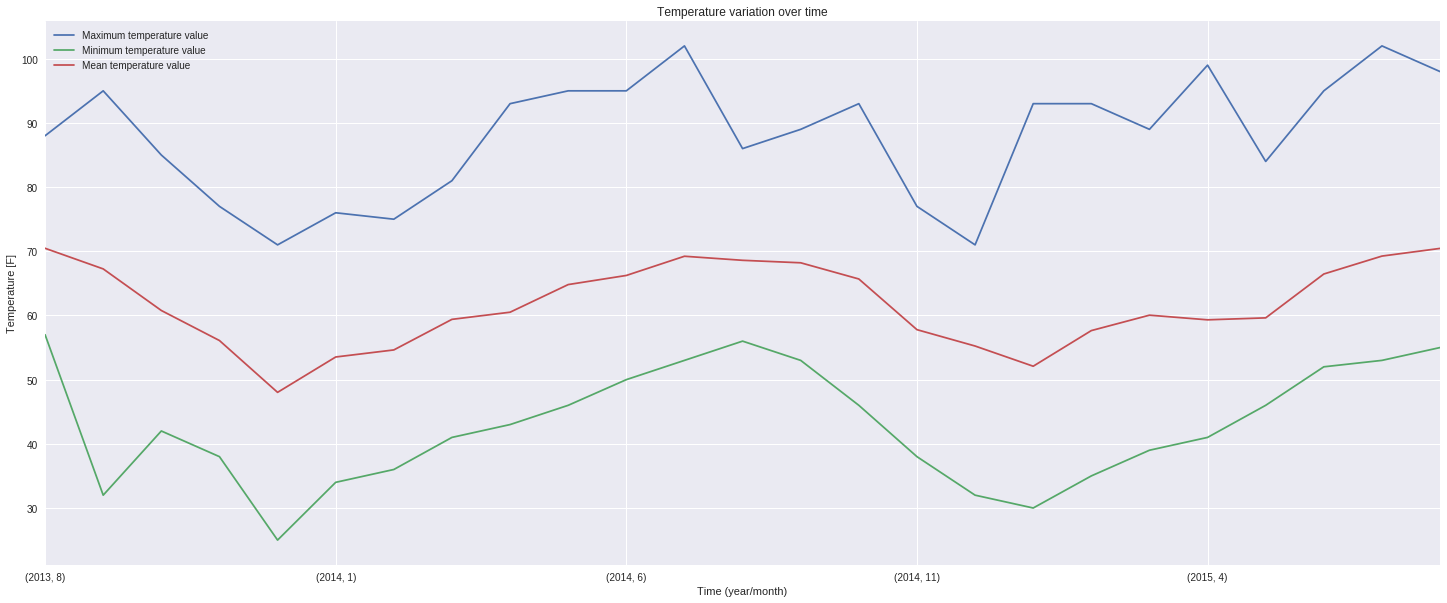

In [23]:
weatherDataFrame.groupby(['year','month']).max_temperature_f.max().plot(figsize=FIG_SIZE)
weatherDataFrame.groupby(['year','month']).min_temperature_f.min().plot(figsize=FIG_SIZE)
axesSubplot = weatherDataFrame.groupby(['year','month']).mean_temperature_f.mean().plot(figsize=FIG_SIZE)
axesSubplot.set(xlabel='Time (year/month)', ylabel='Temperature [F]', title='Temperature variation over time')
axesSubplot.legend(['Maximum temperature value', 'Minimum temperature value', 'Mean temperature value'])

As can be seen in the previous graph, the distribution of temperatures, both maximum, minimum and average, follows a pattern according to the expected temperatures in the different seasons of the year.

### Top 10 hottest days

In [24]:
hottestDaysDataFrame = weatherDataFrame[['date', 'max_temperature_f', 'zip_code']].sort_values('max_temperature_f', ascending=False).head(10)
hottestDaysDataFrame

,date,max_temperature_f,zip_code
2534,2015-07-27,102.0,94063
1433,2014-07-24,102.0,94301
3176,2015-04-30,99.0,94041
2554,2015-08-16,98.0,94063
3649,2015-08-16,97.0,95113
3284,2015-08-16,97.0,94041
1618,2014-07-25,95.0,94041
561,2013-09-07,95.0,94041
2485,2015-06-08,95.0,94063
1203,2014-06-08,95.0,94063


### Top 10 coldest days

In [25]:
coldestDaysDataFrame = weatherDataFrame[['date', 'min_temperature_f', 'zip_code']].sort_values('min_temperature_f', ascending=True).head(10)
coldestDaysDataFrame

,date,min_temperature_f,zip_code
838,2013-12-09,25.0,95113
655,2013-12-10,28.0,94041
839,2013-12-10,28.0,95113
650,2013-12-05,28.0,94041
470,2013-12-09,29.0,94301
841,2013-12-12,29.0,95113
654,2013-12-09,29.0,94041
471,2013-12-10,29.0,94301
834,2013-12-05,29.0,95113
466,2013-12-05,29.0,94301


------

## Trip

### Description

Each row represents an individual bike trip.

* **id** - unique identifier for the trip
* **duration** - duration of the trip
* **start_date** - start date of trip
* **start_station_name** - name of departure station
* **start_station_id** - unique identifier for the departure station
* **end_date** - end date of trip
* **end_station_name** - name of arrival station
* **end_station_id** - unique identifier for the arrival station
* **bike_id** - unique identifier for the bike
* **subscription_type** - type of subscription
* **zip_code** - zip code of the station

### Load trip data set

Take a sample record to inspect and check the number of records in the dataset.

In [26]:
tripFilePath = 'data/trip.csv'

In [27]:
tripDataFrame = pd.read_csv(tripFilePath)

In [28]:
tripDataFrame.sample(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
386532,820943,1704,6/24/2015 18:03,Market at 10th,67,6/24/2015 18:32,Grant Avenue at Columbus Avenue,73,602,Subscriber,94133


In [29]:
tripDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [30]:
print(len(tripDataFrame))

669959


In [31]:
tripDataFrame.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


### Data cleaning

* Convert dates to datetime
* Add a new column for the hour
* Add a new column for the weekday
* Add a new column for the date

In [32]:
tripDataFrame.start_date = pd.to_datetime(tripDataFrame.start_date)

In [33]:
tripDataFrame.end_date = pd.to_datetime(tripDataFrame.end_date)

In [34]:
tripDataFrame['hour'] = tripDataFrame.start_date.dt.hour
tripDataFrame['weekday'] = tripDataFrame.start_date.dt.weekday_name
tripDataFrame['date'] = pd.to_datetime(tripDataFrame.start_date.dt.date)

### Top 10 duration between stations

In [35]:
grouped = tripDataFrame.groupby(['start_station_id', 'end_station_id']).sum()
# Converts duration from seconds to hours
grouped.duration = grouped.duration.map(lambda x: x / (60.0 ** 2))

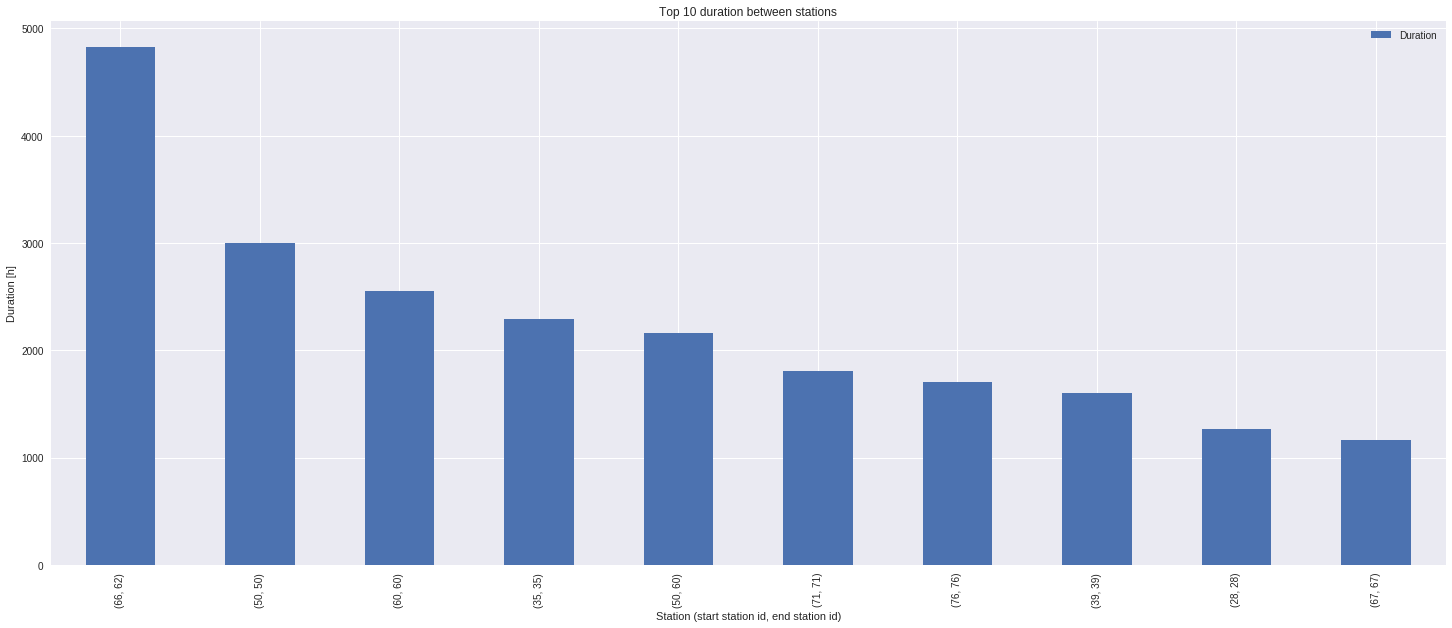

In [36]:
top10 = grouped.sort_values('duration', ascending=False).head(10)
axesSubplot = top10.duration.plot(kind='bar', figsize=FIG_SIZE)
axesSubplot.set(xlabel='Station (start station id, end station id)', ylabel='Duration [h]', title='Top 10 duration between stations')
axesSubplot.legend(['Duration'])

#### Where are the stations from the top 10?

##### Location of the oring station

In [37]:
merged = pd.merge(stationDataFrame, top10.reset_index(), left_on='id', right_on='start_station_id', how='inner')
merged.sort_values('duration', ascending=False)[['start_station_id', 'name', 'city']]

,start_station_id,name,city
6,66,South Van Ness at Market,San Francisco
2,50,Harry Bridges Plaza (Ferry Building),San Francisco
5,60,Embarcadero at Sansome,San Francisco
1,35,University and Emerson,Palo Alto
3,50,Harry Bridges Plaza (Ferry Building),San Francisco
8,71,Powell at Post (Union Square),San Francisco
9,76,Market at 4th,San Francisco
4,39,Powell Street BART,San Francisco
0,28,Mountain View Caltrain Station,Mountain View
7,67,Market at 10th,San Francisco


##### Location of destination station

In [38]:
merged = pd.merge(stationDataFrame, top10.reset_index(), left_on='id', right_on='end_station_id', how='inner')
merged.sort_values('duration', ascending=False)[['end_station_id', 'name', 'city']]

,end_station_id,name,city
6,62,2nd at Folsom,San Francisco
2,50,Harry Bridges Plaza (Ferry Building),San Francisco
4,60,Embarcadero at Sansome,San Francisco
1,35,University and Emerson,Palo Alto
5,60,Embarcadero at Sansome,San Francisco
8,71,Powell at Post (Union Square),San Francisco
9,76,Market at 4th,San Francisco
3,39,Powell Street BART,San Francisco
0,28,Mountain View Caltrain Station,Mountain View
7,67,Market at 10th,San Francisco


As we can see, this agrees with the fact that in _San Francisco_ is the largest number of bicycles.

### Top 10 most connected stations

In [39]:
grouped = tripDataFrame.groupby(['start_station_id', 'end_station_id']).count()

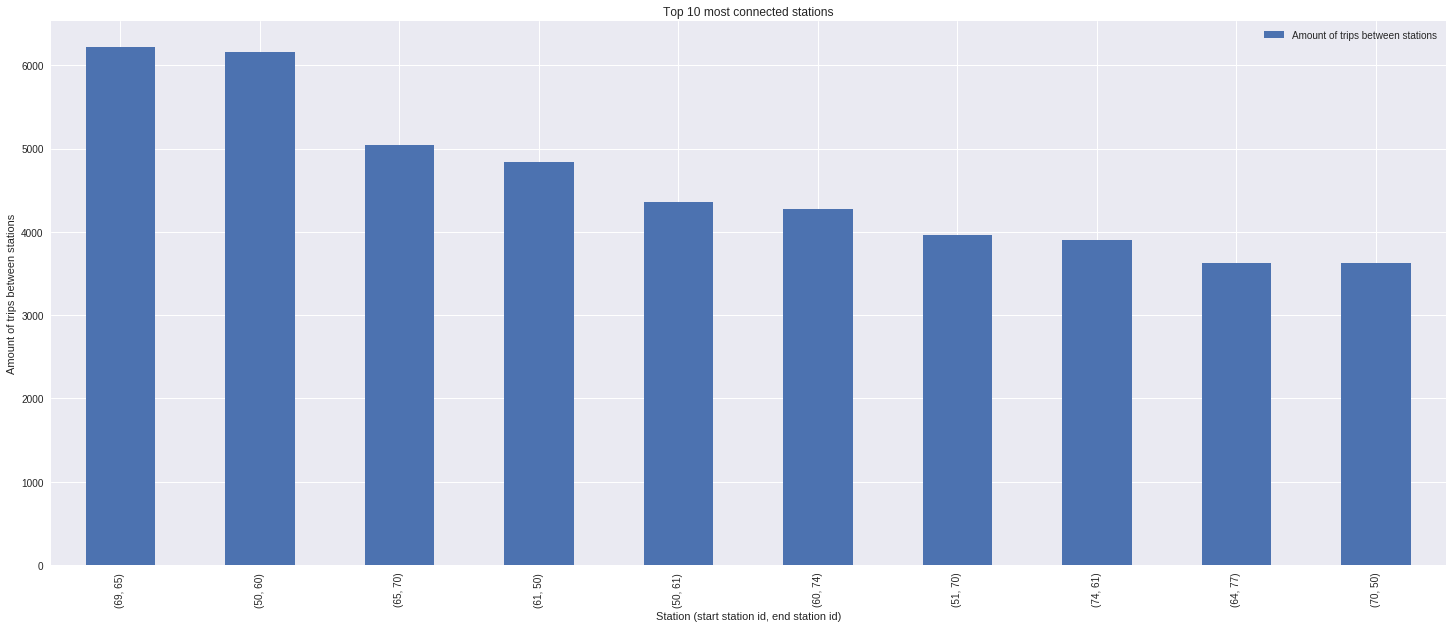

In [40]:
top10 = grouped.sort_values('duration', ascending=False).head(10)
axesSubplot = top10.duration.plot(kind='bar', figsize=FIG_SIZE)
axesSubplot.set(xlabel='Station (start station id, end station id)', ylabel='Amount of trips between stations', title='Top 10 most connected stations')
axesSubplot.legend(['Amount of trips between stations'])

#### Where are the stations from the top 10?

##### Location of the oring station

In [41]:
merged = pd.merge(stationDataFrame, top10.reset_index(), left_on='id', right_on='start_station_id', how='inner')
merged.sort_values('duration', ascending=False)[['start_station_id', 'name', 'city']]

,start_station_id,name,city
7,69,San Francisco Caltrain 2 (330 Townsend),San Francisco
0,50,Harry Bridges Plaza (Ferry Building),San Francisco
6,65,Townsend at 7th,San Francisco
4,61,2nd at Townsend,San Francisco
1,50,Harry Bridges Plaza (Ferry Building),San Francisco
3,60,Embarcadero at Sansome,San Francisco
2,51,Embarcadero at Folsom,San Francisco
9,74,Steuart at Market,San Francisco
5,64,2nd at South Park,San Francisco
8,70,San Francisco Caltrain (Townsend at 4th),San Francisco


##### Location of the destination station

In [42]:
merged = pd.merge(stationDataFrame, top10.reset_index(), left_on='id', right_on='end_station_id', how='inner')
merged.sort_values('duration', ascending=False)[['end_station_id', 'name', 'city']]

,end_station_id,name,city
5,65,Townsend at 7th,San Francisco
2,60,Embarcadero at Sansome,San Francisco
6,70,San Francisco Caltrain (Townsend at 4th),San Francisco
0,50,Harry Bridges Plaza (Ferry Building),San Francisco
3,61,2nd at Townsend,San Francisco
8,74,Steuart at Market,San Francisco
7,70,San Francisco Caltrain (Townsend at 4th),San Francisco
4,61,2nd at Townsend,San Francisco
9,77,Market at Sansome,San Francisco
1,50,Harry Bridges Plaza (Ferry Building),San Francisco


Again, as expected, the city of _San Francisco_ has a major role in front of the other cities.

### Number of rented bikes per hour/per day of the week

In [43]:
grouped = tripDataFrame[['hour', 'weekday']].groupby(['hour', 'weekday']).size()
countsDataFrame = pd.DataFrame(grouped.rename('counts'))
countsDataFrame = countsDataFrame.reset_index()
matrix = pd.pivot_table(countsDataFrame, index='hour', columns='weekday', values='counts')
matrix = matrix[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

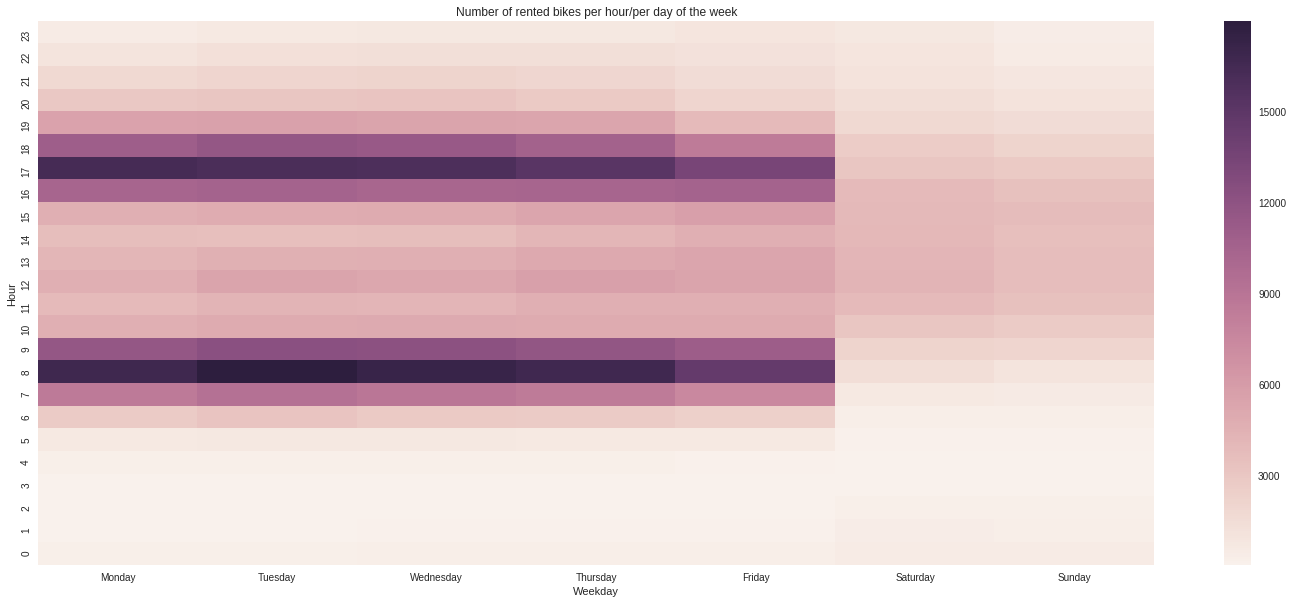

In [44]:
fig, ax = plt.subplots(figsize=FIG_SIZE) 
axesSubplot = sb.heatmap(matrix)
axesSubplot.invert_yaxis()
axesSubplot.set(xlabel='Weekday', ylabel='Hour', title='Number of rented bikes per hour/per day of the week')

In this HeatMap we can see that the strong use of bicycles is in the two strips between the 7 to 10 in the morning and between the 16 and the 19 hours the days of Monday to Friday.
While throughout the week (including Saturdays and Sundays) a constant use of bicycles is maintained in the time zone from 10 to 17 hours.

### Number of trips on the hottest, coldest and rainiest day

In [45]:
hottestDayDataFrame = weatherDataFrame[['date', 'max_temperature_f', 'zip_code']].sort_values('max_temperature_f', ascending=False).head(1)
hottestDayDataFrame

,date,max_temperature_f,zip_code
2534,2015-07-27,102.0,94063


In [46]:
coldestDayDataFrame = weatherDataFrame[['date', 'min_temperature_f', 'zip_code']].sort_values('min_temperature_f', ascending=True).head(1)
coldestDayDataFrame

,date,min_temperature_f,zip_code
838,2013-12-09,25.0,95113


In [47]:
rainiestDayDataFrame = weatherDataFrame[['date', 'precipitation_inches', 'zip_code']].sort_values('precipitation_inches', ascending=False).head(1)
rainiestDayDataFrame

,date,precipitation_inches,zip_code
3036,2014-12-11,3.36,94041


In [48]:
merged0 = pd.merge(tripDataFrame, hottestDayDataFrame, left_on='date', right_on='date', how='inner')
merged0 = pd.merge(merged0, hottestDayDataFrame, left_on='zip_code_y', right_on='zip_code', how='inner')

In [49]:
merged1 = pd.merge(tripDataFrame, coldestDayDataFrame, left_on='date', right_on='date', how='inner')
merged1 = pd.merge(merged1, coldestDayDataFrame, left_on='zip_code_y', right_on='zip_code', how='inner')

In [50]:
merged2 = pd.merge(tripDataFrame, rainiestDayDataFrame, left_on='date', right_on='date', how='inner')
merged2 = pd.merge(merged2, rainiestDayDataFrame, left_on='zip_code_y', right_on='zip_code', how='inner')

In [51]:
resultDataFrame = pd.DataFrame(columns=['type', 'number of trips'])
resultDataFrame.loc['0'] = pd.Series({'type': 'Hottest day', 'number of trips': len(merged0)})
resultDataFrame.loc['1'] = pd.Series({'type': 'Coldest day', 'number of trips': len(merged1)})
resultDataFrame.loc['2'] = pd.Series({'type': 'Rainiest day', 'number of trips': len(merged2)})

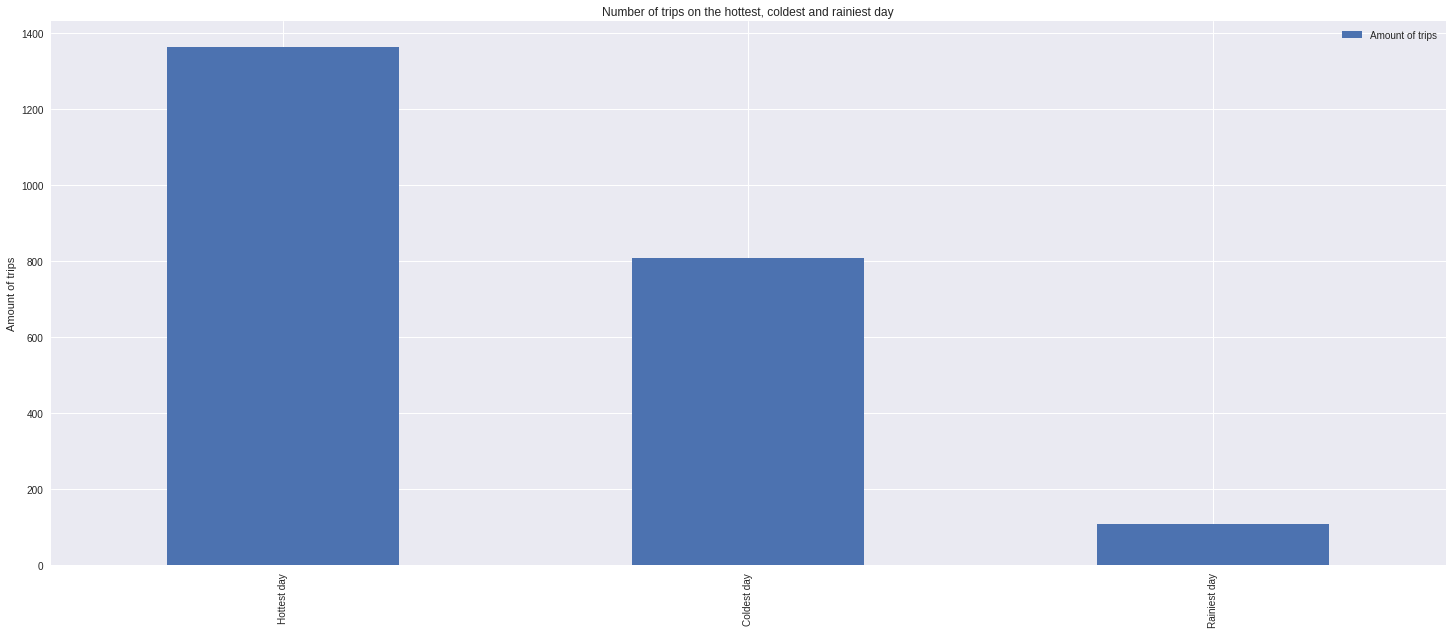

In [52]:
axesSubplot = resultDataFrame.plot(kind='bar', figsize=FIG_SIZE)
axesSubplot.set(xlabel='', ylabel='Amount of trips', title='Number of trips on the hottest, coldest and rainiest day')
axesSubplot.legend(['Amount of trips'])
axesSubplot.set_xticklabels(resultDataFrame.type)

As expected, on the rainiest day the use of bicycles is minimal. As for the coldest day the use of bicycles is reduced to almost half.

------

## Status

### Description

Each row represents the number of bikes and docks available for given station and minute.

* **station_id** - unique identifier for the station
* **bikes_available** -  number of bikes available
* **docks_available** - number of docks available
* **time** - current time

### Load status data set

Take a sample record to inspect and check the number of records in the dataset.

In [198]:
statusFilePath = 'data/status.csv'

In [199]:
statusDataFrame = pd.read_csv(statusFilePath)

In [200]:
statusDataFrame.sample(1)

,station_id,bikes_available,docks_available,time
21609067,24,9,6,2014-06-09 20:07:02


In [201]:
statusDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
station_id         int64
bikes_available    int64
docks_available    int64
time               object
dtypes: int64(3), object(1)
memory usage: 2.1+ GB


In [202]:
print len(statusDataFrame)

71984434


In [203]:
statusDataFrame.describe()

,station_id,bikes_available,docks_available
count,7.198443e+07,7.198443e+07,7.198443e+07
mean,4.253149e+01,8.394812e+00,9.284729e+00
std,2.376117e+01,3.993586e+00,4.175442e+00
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,6.000000e+00,6.000000e+00
50%,4.200000e+01,8.000000e+00,9.000000e+00
75%,6.300000e+01,1.100000e+01,1.200000e+01
max,8.400000e+01,2.700000e+01,2.700000e+01


### Data cleaning

* Convert dates to datetime
* Add a new column for the weekday name
* Add a new column for the hour

In [204]:
statusDataFrame.time = pd.to_datetime(statusDataFrame.time)

In [205]:
statusDataFrame['weekday name'] = statusDataFrame['time'].dt.weekday_name
statusDataFrame['hour'] = statusDataFrame.time.dt.hour

### Amount of bikes and docks availables over time

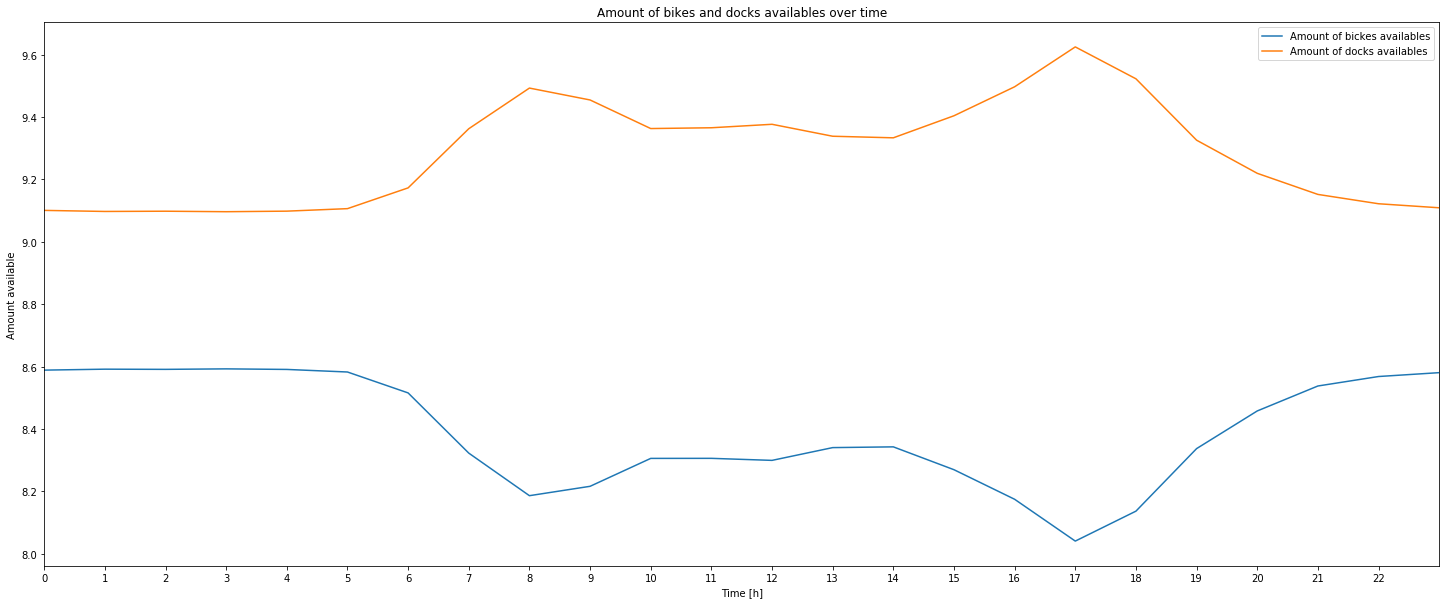

In [207]:
statusDataFrame.groupby(statusDataFrame.hour).mean().bikes_available.plot(figsize=(25, 10))
axesSubplot = statusDataFrame.groupby(statusDataFrame.time.dt.hour).mean().docks_available.plot(figsize=(25, 10))
axesSubplot.set(xlabel='Time [h]', ylabel='Amount available', title='Amount of bikes and docks availables over time', xticks=range(0, 23))
axesSubplot.legend(['Amount of bickes availables', 'Amount of docks availables'])

As we can see in the graphic, the number of available bicycles remains almost constant at dawn, and reaches two clearly noticeable minimum peaks at times where work begins and ends.

------

## Conclusions

It can be noted that the time ranges where the service is most used is in the morning and afternoon, so we can conclude that the inhabitants use it to move to their jobs on weekdays. However, we can clearly see that the use of the service remains constant throughout the morning until dusk all week.
Last but not least, we emphasize that the climate plays a fundamental role in the use of bicycles, since we can see that on both cooler days and on rainy days the use of bicycles decreases significantly.